# Final Project - ECS 171
---

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

## Overview

### Dataset attribute information

1. **Recency (months)** - frequency since last donation.
2. **Frequency (times)** - total number of donations.
3. **Monetary (c.c. blood)** - total blood donated. 
4. **Time (months)** - months since first donation.
5. **whether he/she donated blood in March 2007 (binary variable)** - 1 if blood was donated, 0 if not.


## Data Preprocessing

### Setup libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

### Load in data

In [7]:
data = pd.read_csv("./transfusion.csv")
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


### Check for NA values

In [8]:
data.isna().any()

Recency (months)                              False
Frequency (times)                             False
Monetary (c.c. blood)                         False
Time (months)                                 False
whether he/she donated blood in March 2007    False
dtype: bool

### Feature Renaming

The feature names are not ideal. We will rename them to simpler ones.

**Mapping:**
- "Recency (months)" -> "recency"
- "Frequency (times)" -> "frequency"
- "Monetary (c.c. blood)" -> "monetary"
- "Time (months)" -> "time"
- "whether he/she donated blood in March 2007" -> "donated"

In [9]:
data.columns = ["recency", "frequency", "monetary", "time", "donated"]
data.head()

,recency,frequency,monetary,time,donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## Exploratory Analysis

### Generate correlation matrix and pairplot

#### Pairplot

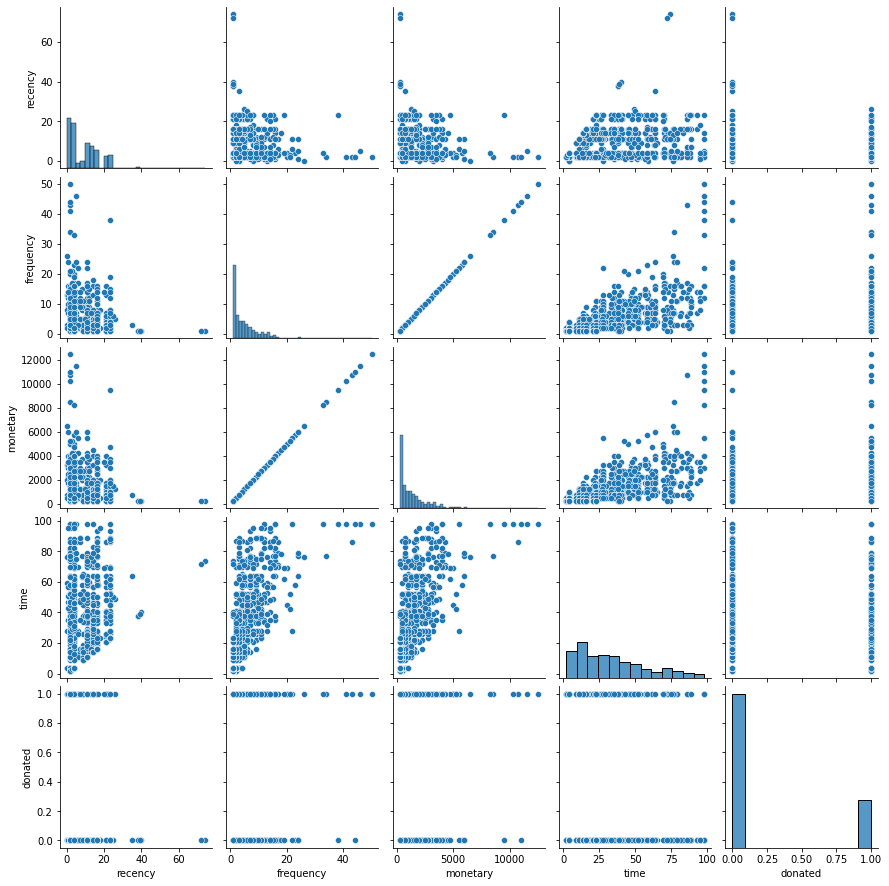

In [10]:
sns.pairplot(data)

#### Correlation Matrix

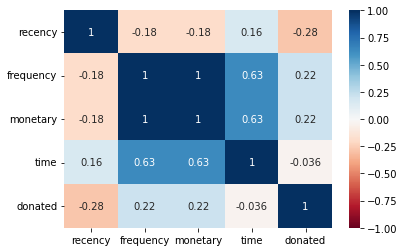

In [11]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, center=0, annot= True, cmap= 'RdBu', fmt = '.2g')

In [12]:
 # variance of 'monetary' and 'frequency'
print(data.var()['monetary'])
print(data.var()['frequency'])

2131094.229860619
34.097507677769904


### Findings

-  Note features **frequency** and **monetary** have a perfect correlation value of **1**.
-  This is due to the fact that the same amount of blood is donated each visit. 
- *So the number of visits and the total blood donated are **proportional** to each other.*

### Conclusion

- Features **frequency** and **monetary** provide identical information to our model.
- One of the two features should be dropped to avoid redundancy.
- We will choose to drop **monetary**

In [13]:
data.drop(columns="monetary", inplace=True)

### Data Partitioning

In [14]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = .2, random_state = 33)

X_train, y_train = train.drop(columns= "donated"), train["donated"]
X_test, y_test = test.drop(columns= "donated"), test["donated"]

### Feature Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model Fitting

In [16]:
from sklearn.svm import LinearSVC
model = LinearSVC(dual=False)
model.fit(X_train, y_train)

LinearSVC(dual=False)

### Model Evaluation

In [17]:
y_pred = model.predict(X_test)

#### Classification Report

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87       116
           1       0.60      0.09      0.15        34

    accuracy                           0.78       150
   macro avg       0.69      0.54      0.51       150
weighted avg       0.74      0.78      0.71       150



#### Confusion Matrix

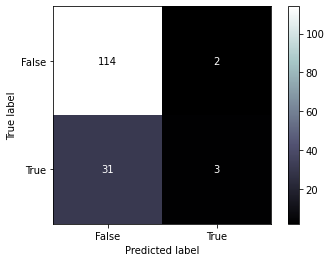

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(cmap='bone')
plt.show()

#### Comparing Classifcation Reports

In [20]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.98      0.87       454
           1       0.64      0.10      0.17       144

    accuracy                           0.77       598
   macro avg       0.71      0.54      0.52       598
weighted avg       0.74      0.77      0.70       598

              precision    recall  f1-score   support

           0       0.79      0.98      0.87       116
           1       0.60      0.09      0.15        34

    accuracy                           0.78       150
   macro avg       0.69      0.54      0.51       150
weighted avg       0.74      0.78      0.71       150



## Model #2

### A preview with the data

In [21]:
data

,recency,frequency,time,donated
0,2,50,98,1
1,0,13,28,1
2,1,16,35,1
3,2,20,45,1
4,1,24,77,0
...,...,...,...,...
743,23,2,38,0
744,21,2,52,0
745,23,3,62,0
746,39,1,39,0


Text(0.5, 0, 'Time')

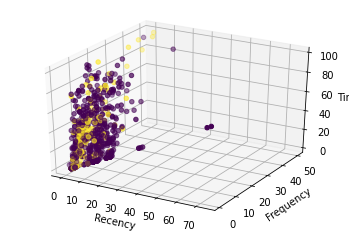

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = data['recency']
y = data['frequency']
z = data['time']

ax.scatter(x, y, z, c=data.donated)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Time')

### Fitting the model

In [23]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

### Confusion Matrix and classification report



In [24]:
from sklearn.metrics import confusion_matrix, classification_report

myconfusionmatrix = confusion_matrix(y_test, y_pred, labels=svm.classes_)
display(myconfusionmatrix)

array([[114,   2],
       [ 31,   3]])

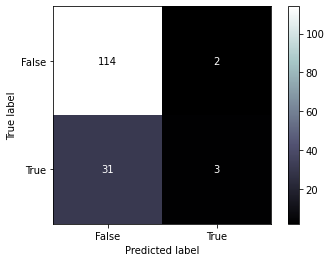

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(cmap='bone')
plt.show()

In [26]:
svm.score(X_test,y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87       116
           1       0.60      0.09      0.15        34

    accuracy                           0.78       150
   macro avg       0.69      0.54      0.51       150
weighted avg       0.74      0.78      0.71       150



In [27]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.77      0.98      0.87       454
           1       0.64      0.10      0.17       144

    accuracy                           0.77       598
   macro avg       0.71      0.54      0.52       598
weighted avg       0.74      0.77      0.70       598

